# ---------------------------------- Imports ----------------------------------

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from knac_helpers import prepareDf2, myPlot1, myPlot2, make_blobs_weights, generate_weights, display_side_by_side, split, merge

In [3]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import umap

from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs

from sklearn.cluster import KMeans

In [4]:
import pandas as pd
import numpy as np

In [5]:
from knac import KnacSplits, KnacMerges

#  ---------------------------------- Helpers ----------------------------------

In [6]:
random_state = 170

In [7]:
def prepare_splits_df(splits):
    if (splits.empty):
        return pd.DataFrame(columns = ['clusters', 'confidence'])
    
    splits = splits.to_frame()
    splits = splits['split'].apply(lambda x: pd.Series(x))
    splits.rename(columns={0:'clusters', 1:'confidence'}, inplace=True)
    return splits

def print_test_results(s_10, s, s_silhouette, m, m_metrics, dataset_name):
    print_for_single = display
    print_for_many = display_side_by_side

    print('''
####################################
############## SPLITS ##############
####################################

---- normal thld=0.2 ------ normal thld=0.6 ------ with silhouette 0.5 --''')
    
    s_10_df = prepare_splits_df(s_10)
    s_df = prepare_splits_df(s)
    s_silhouette_df = prepare_splits_df(s_silhouette)
    
    print_for_many(s_10_df, s_df, s_silhouette_df)
    
    print('''
####################################
############## MERGES ##############
####################################
''')
        
    print('standard merges')
    print_for_single(m)
    
    print('\nmerges (with linkage criterion)\n------ single link ------ avg. link ------ complete link ------ centroids ------ ward\'s\n')
    print_for_many(*m_metrics)

In [8]:
def test_splitmerge_without_plot(df, X, Y, E, dataset_name):
    if isinstance(Y,np.ndarray):
        Y=Y.astype(str)
    elif isinstance(Y, list):
        Y=np.array(Y).astype(str)
        
    E=E.astype(str)
    df.columns = [str(c) for c in df.columns]
    df.index = df.index.astype(str)
    # ------------------ splits ------------------

    s_10 = KnacSplits(confidence_threshold=0.2).fit_transform(df)
    s = KnacSplits(confidence_threshold=0.6).fit_transform(df)
    s_silhouette =  KnacSplits(confidence_threshold=0.6, 
                               silhouette_weight=0.5).fit_transform(df,
                                                                    y=None,
                                                                      data = X,
                                                                      labels_automatic=Y,
                                                                      labels_expert =E)
 
    
    
    # ------------------ merges ------------------
    m=KnacMerges().fit_transform(df,data=X,labels_expert=E.astype(str))
    metrics = ['single_link', 'average_link', 'complete_link', 'centroids_link', 'wards_link']
    m_metrics = []
    
    for metric in metrics:
        m_ = KnacMerges(confidence_threshold=0.6, metric = metric, metric_weight=0.2).fit_transform(df,data=X,labels_expert=E)
        m_metrics.append(m_)
    
    
    # ------------------ printing all ------------------
    print_test_results(s_10, s, s_silhouette, m, m_metrics, dataset_name)
    
    return (s_10, s, s_silhouette)

def test_splitmerge(X, Y, E, dataset_name, centersY=None, centersE=None, patches=None):
    if isinstance(Y,np.ndarray):
        Y=Y.astype(str)
    elif isinstance(Y, list):
        Y=np.array(Y).astype(str)
        
    df = prepareDf2(E, Y)
    knac = KnacSplits()
    knac.fit(df)
    
    h_sm = knac.H_split
    
    myPlot1(X, Y, E, dataset_name=dataset_name, centersY=centersY, centersE=centersE, patches=patches, heatmap_matrix=h_sm, heatmap_matrix_type='split')
    
    test_splitmerge_without_plot(df, X, Y, E, dataset_name)

# ------------------------------

In [9]:
plt.rc('axes', facecolor='#E6E6E6', edgecolor='none',
       axisbelow=True, grid=True)
plt.rc('grid', color='w', linestyle='solid')

# ---------------------------------- Examples ----------------------------------

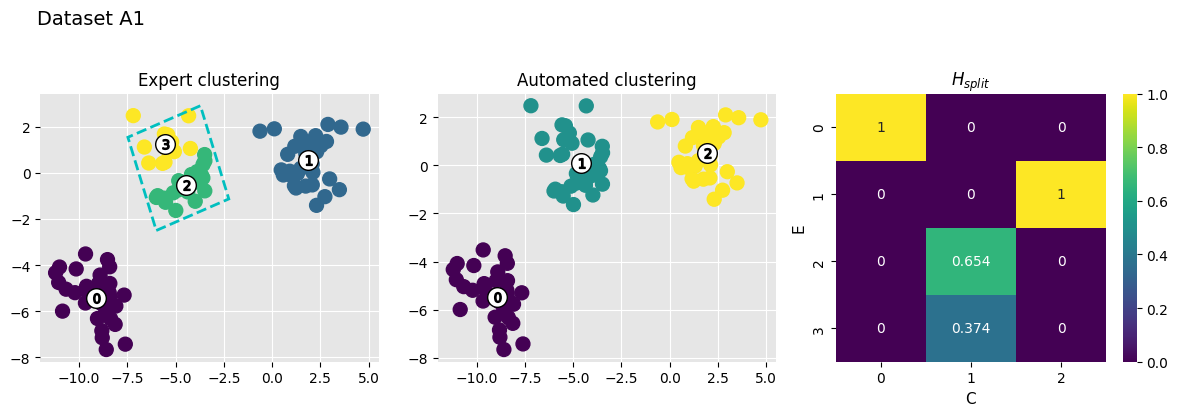


####################################
############## SPLITS ##############
####################################

---- normal thld=0.2 ------ normal thld=0.6 ------ with silhouette 0.5 --


,clusters,confidence
,clusters,confidence
,clusters,confidence



####################################
############## MERGES ##############
####################################

standard merges


,C1,C2,similarity
3,2,3,1.0



merges (with linkage criterion)
------ single link ------ avg. link ------ complete link ------ centroids ------ ward's


,C1,C2,similarity
3,2,3,0.983777
,C1,C2,similarity
3,2,3,0.980793
,C1,C2,similarity
3,2,3,0.979155
,C1,C2,similarity
3,2,3,0.966338
,C1,C2,similarity
3,2,3,0.989502


In [10]:
X1, Y1, centers1 = make_blobs(n_features=2, centers=3, random_state=random_state, return_centers=True)

clusterer4 = KMeans(n_clusters=4, random_state=random_state)
E4 = clusterer4.fit_predict(X1)

rect0 = patches.Rectangle((-6,-2.5),4,4.3,angle=20,ec='c', fc="None", ls='--', linewidth=2, clip_on=False)
_ = test_splitmerge(X1, Y1, E4, 'A1', centers1, clusterer4.cluster_centers_, patches={'E': [rect0]})


# ------------------------------


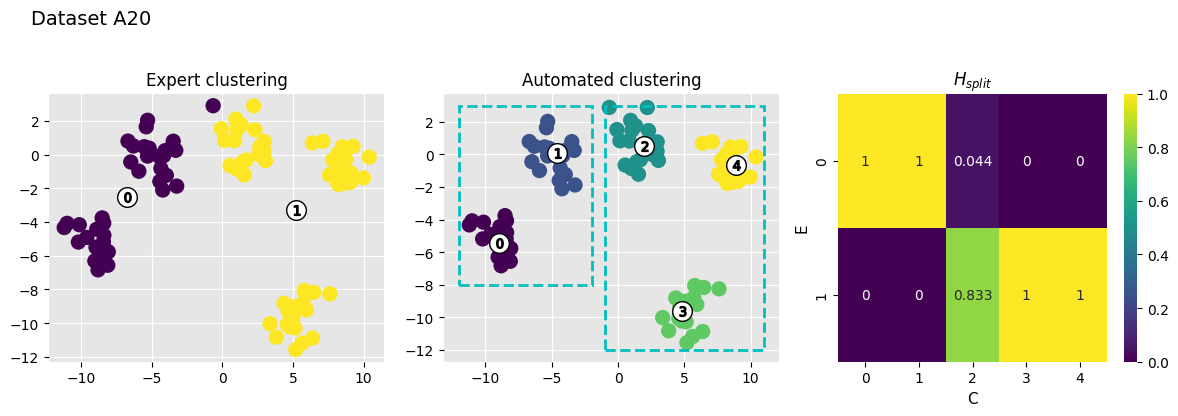


####################################
############## SPLITS ##############
####################################

---- normal thld=0.2 ------ normal thld=0.6 ------ with silhouette 0.5 --


,clusters,confidence
0,"(0, 1)",1.000000
1,"(2, 3, 4)",0.944404
,clusters,confidence
0,"(0, 1)",1.000000
1,"(2, 3, 4)",0.944404
,clusters,confidence
0,"(0, 1)",0.742815
1,"(2, 3, 4)",0.735472



####################################
############## MERGES ##############
####################################

standard merges


,C1,C2,similarity



merges (with linkage criterion)
------ single link ------ avg. link ------ complete link ------ centroids ------ ward's


,C1,C2,similarity
,C1,C2,similarity
,C1,C2,similarity
,C1,C2,similarity
,C1,C2,similarity


In [11]:
X20, Y20, centers20 = make_blobs(n_features=2, centers=5, random_state=random_state, return_centers=True)

clusterer20 = KMeans(n_clusters=2, random_state=random_state)
E20 = clusterer20.fit_predict(X20)

rect0 = patches.Rectangle((-12,-8),10,11,angle=0,ec='c', fc="None", ls='--', linewidth=2, clip_on=False)
rect1 = patches.Rectangle((-1,-12),12,15,angle=0,ec='c', fc="None", ls='--', linewidth=2, clip_on=False)
_ = test_splitmerge(X20, Y20, E20, 'A20', centers20, clusterer20.cluster_centers_, patches={'C': [rect0, rect1]})


# ------------------------------


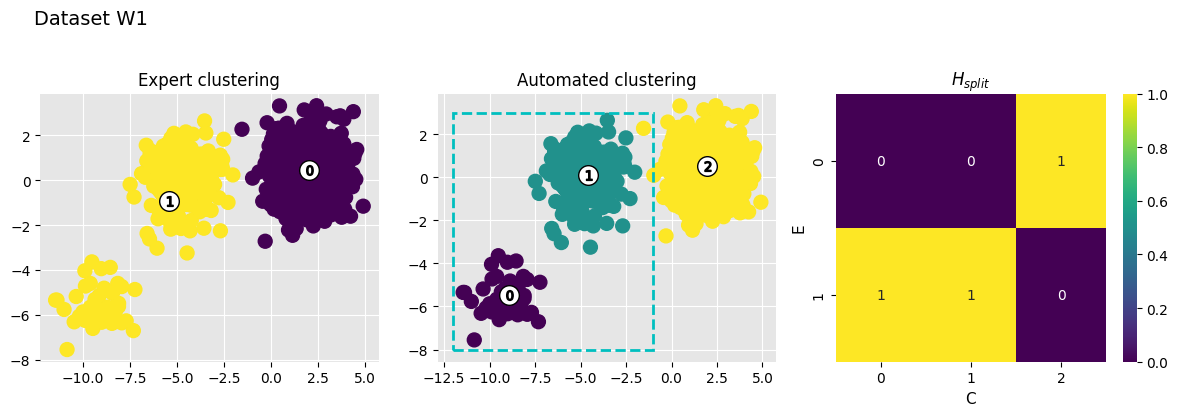


####################################
############## SPLITS ##############
####################################

---- normal thld=0.2 ------ normal thld=0.6 ------ with silhouette 0.5 --


,clusters,confidence
1,"(0, 1)",1.0
,clusters,confidence
1,"(0, 1)",1.0
,clusters,confidence
1,"(0, 1)",0.752256



####################################
############## MERGES ##############
####################################

standard merges


,C1,C2,similarity



merges (with linkage criterion)
------ single link ------ avg. link ------ complete link ------ centroids ------ ward's


,C1,C2,similarity
,C1,C2,similarity
,C1,C2,similarity
,C1,C2,similarity
,C1,C2,similarity


In [12]:
np.random.seed(random_state + 1)
X1_w, Y1_w, centers1_w = make_blobs_weights(weights=[0.05, 0.25, 0.7], n_samples=1000, n_features=2, centers=3, random_state=random_state, return_centers=True)
clusterer1_w = KMeans(n_clusters=2, random_state=random_state)
E1_w = clusterer1_w.fit_predict(X1_w)

rect0 = patches.Rectangle((-12,-8),11,11,angle=0,ec='c', fc="None", ls='--', linewidth=2, clip_on=False)
_ = test_splitmerge(X1_w, Y1_w, E1_w, 'W1', centers1_w, clusterer1_w.cluster_centers_, patches={'C': [rect0]})

# ------------------------------

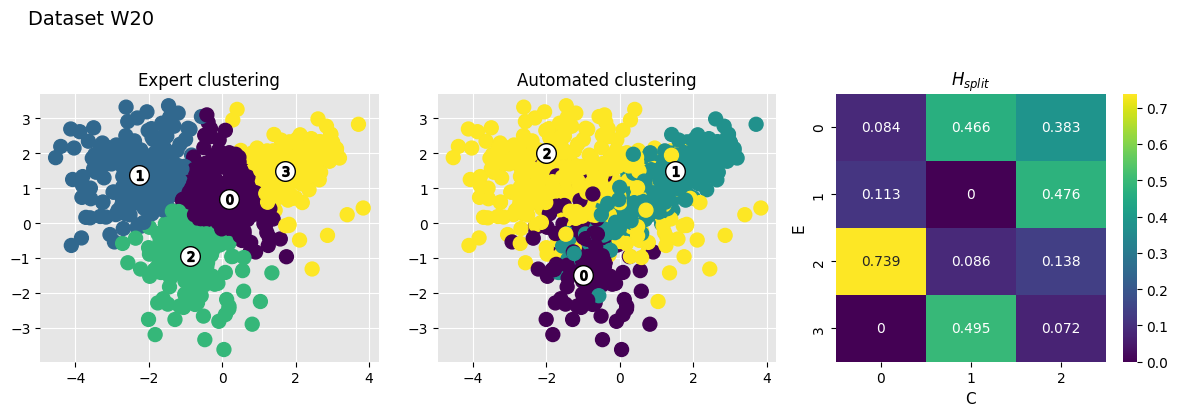


####################################
############## SPLITS ##############
####################################

---- normal thld=0.2 ------ normal thld=0.6 ------ with silhouette 0.5 --


,clusters,confidence
0,"(1, 2)",0.424283
,clusters,confidence
,clusters,confidence
0,"(1, 2)",0.449435



####################################
############## MERGES ##############
####################################

standard merges


,C1,C2,similarity
1,0,3,0.902086



merges (with linkage criterion)
------ single link ------ avg. link ------ complete link ------ centroids ------ ward's


,C1,C2,similarity
1,0,1,0.606004
2,0,3,0.911323
,C1,C2,similarity
1,0,3,0.877531
,C1,C2,similarity
1,0,3,0.895392
,C1,C2,similarity
1,0,3,0.835652
,C1,C2,similarity
1,0,3,0.86075


In [13]:
np.random.seed(random_state + 10)
weights = generate_weights(size=3)

X20_w, Y20_w = make_classification(n_samples=1000, n_features=2, n_redundant=0, n_informative=2, n_classes=3,
                             n_clusters_per_class=1, random_state=random_state + 10, weights=weights)

clusterer20_w = KMeans(n_clusters=4, random_state=random_state)
E20_w = clusterer20_w.fit_predict(X20_w)
centers20_w_Y = np.array([[-1, -1.5], [1.5, 1.5], [-2, 2]])
_ = test_splitmerge(X20_w, Y20_w, E20_w, 'W20', centers20_w_Y, clusterer20_w.cluster_centers_)

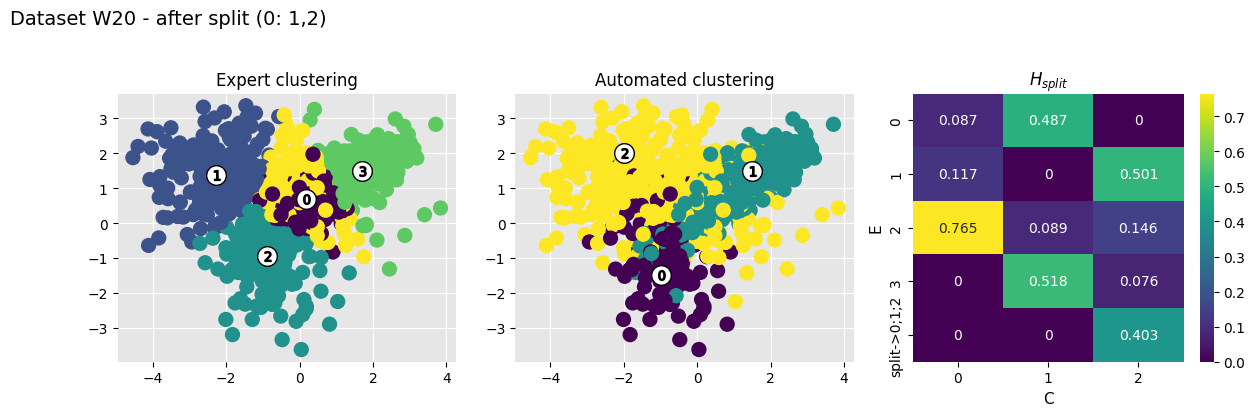


####################################
############## SPLITS ##############
####################################

---- normal thld=0.2 ------ normal thld=0.6 ------ with silhouette 0.5 --


,clusters,confidence
,clusters,confidence
,clusters,confidence



####################################
############## MERGES ##############
####################################

standard merges


,C1,C2,similarity
1,0,3,0.991953
3,1,split->0;1;2,0.993205



merges (with linkage criterion)
------ single link ------ avg. link ------ complete link ------ centroids ------ ward's


,C1,C2,similarity
1,0,3,0.980163
3,1,split->0;1;2,0.980144
,C1,C2,similarity
1,0,3,0.944703
3,1,split->0;1;2,0.907840
,C1,C2,similarity
1,0,3,0.937110
3,1,split->0;1;2,0.899448
,C1,C2,similarity
1,0,3,0.910989


In [14]:
E20_w_s1 = split(E20_w, Y20_w, row=0, col1=1, col2=2)
_ = test_splitmerge(X20_w, Y20_w, E20_w_s1, 'W20 - after split (0: 1,2)', centers20_w_Y, clusterer20_w.cluster_centers_)

# ------------------------------

In [15]:
X101, Y101 = make_classification(n_samples=1000, n_features=20, n_redundant=5, n_informative=15, n_classes=10,
                             n_clusters_per_class=1, random_state=random_state + 10)

np.random.seed(random_state + 101)
weights = generate_weights(size=10)
X101_w, Y101_w = make_classification(n_samples=1000, n_features=20, n_redundant=5, n_informative=15, n_classes=10,
                             n_clusters_per_class=1, random_state=random_state + 10, weights=weights)

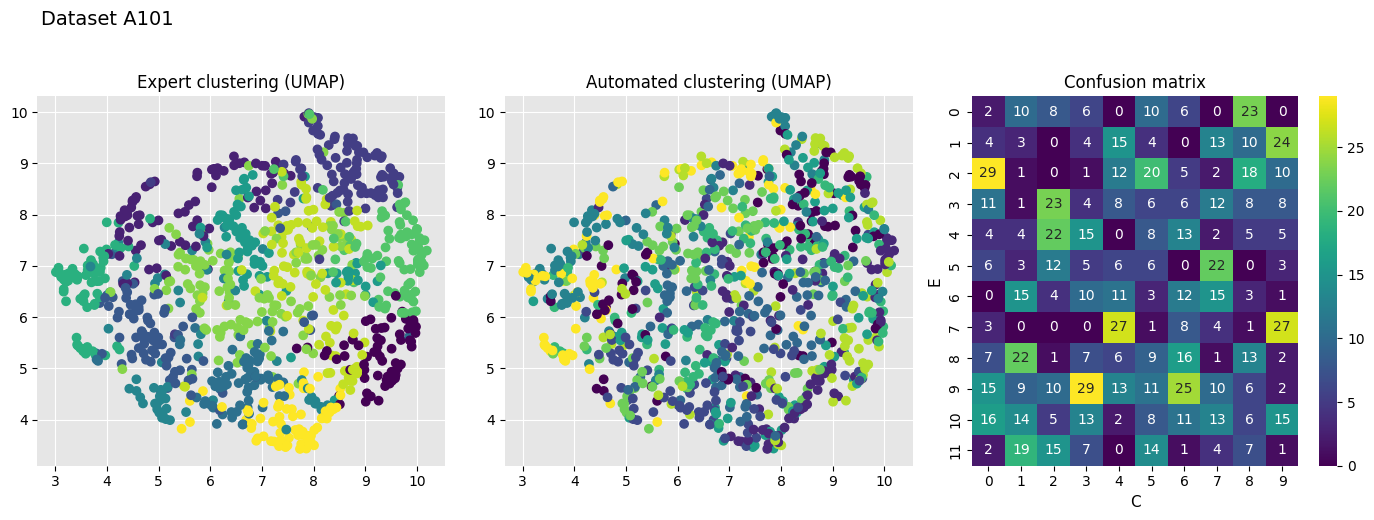


####################################
############## SPLITS ##############
####################################

---- normal thld=0.2 ------ normal thld=0.6 ------ with silhouette 0.5 --


,clusters,confidence
1,"(4, 7, 9)",0.281125
2,"(0, 5, 8)",0.377472
3,"(2, 7)",0.289732
4,"(2, 3, 6)",0.270238
6,"(1, 7)",0.252574
7,"(4, 9)",0.431249
8,"(1, 6, 8)",0.281727
9,"(0, 3, 4, 6)",0.332118
10,"(0, 1, 3, 7, 9)",0.230509
11,"(1, 2, 5)",0.269837



####################################
############## MERGES ##############
####################################

standard merges


,C1,C2,similarity
2,1,7,0.866572
5,3,4,0.809992
6,3,5,0.808811



merges (with linkage criterion)
------ single link ------ avg. link ------ complete link ------ centroids ------ ward's


,C1,C2,similarity
1,0,8,0.742811
2,0,11,0.713234
4,1,7,0.808233
5,1,10,0.660310
9,3,4,0.770607
10,3,5,0.769447
11,3,9,0.636797
16,4,9,0.747576
21,5,6,0.661072
25,6,8,0.749452


In [16]:
E101 = KMeans(n_clusters=12, random_state=random_state).fit_predict(X101)
df101 = myPlot2(X101, Y101, E101, dataset_name='A101')
_ = test_splitmerge_without_plot(df101, X101, Y101, E101, 'A101')

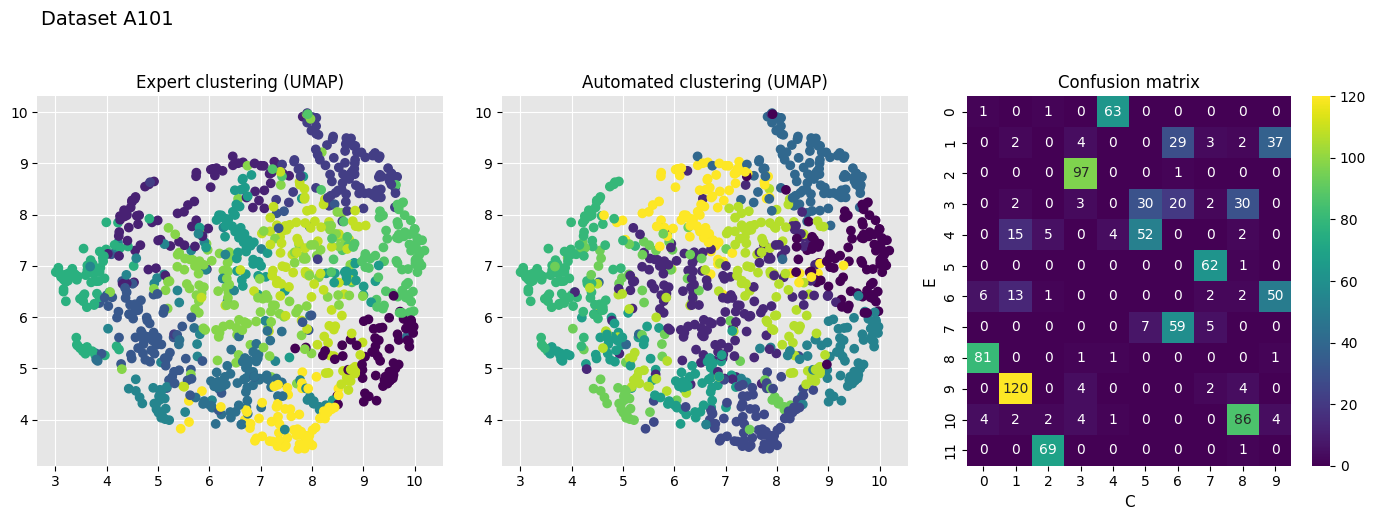


####################################
############## SPLITS ##############
####################################

---- normal thld=0.2 ------ normal thld=0.6 ------ with silhouette 0.5 --


,clusters,confidence
1,"(6, 9)",0.40170
3,"(5, 6, 8)",0.29399
,clusters,confidence
,clusters,confidence
1,"(6, 9)",0.449717



####################################
############## MERGES ##############
####################################

standard merges


,C1,C2,similarity



merges (with linkage criterion)
------ single link ------ avg. link ------ complete link ------ centroids ------ ward's


,C1,C2,similarity
2,1,6,0.738205
5,3,4,0.649410
15,10,3,0.622739
,C1,C2,similarity
2,1,6,0.790260
3,1,7,0.624982
6,3,4,0.696504
17,10,3,0.673995
,C1,C2,similarity
2,1,6,0.751363


In [17]:
A101 = KMeans(n_clusters=10, random_state=random_state).fit_predict(X101)
df101_A = myPlot2(X101, A101, E101, dataset_name='A101')
_ = test_splitmerge_without_plot(df101_A, X101, A101, E101, 'A101')

/home/sbk/Software/knac/examples/../knac_helpers/knac_helpers.py:308: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask = np.invert(np.logical_and(E == row, Y == col2))


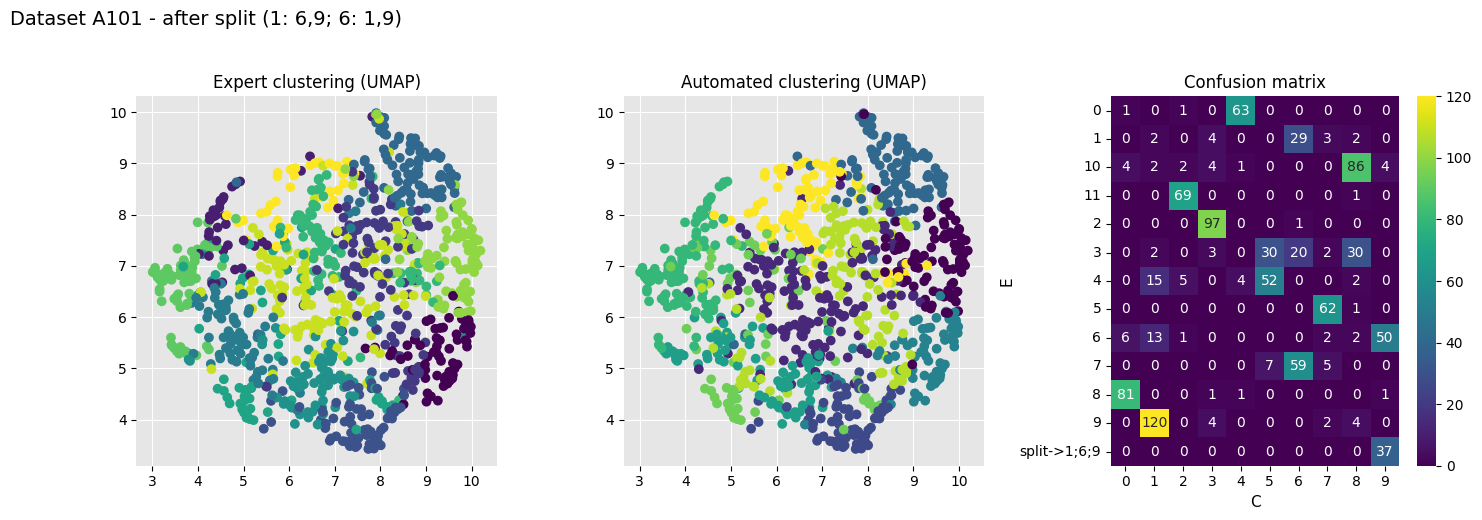


####################################
############## SPLITS ##############
####################################

---- normal thld=0.2 ------ normal thld=0.6 ------ with silhouette 0.5 --


,clusters,confidence
3,"(5, 6, 8)",0.295926
,clusters,confidence
,clusters,confidence



####################################
############## MERGES ##############
####################################

standard merges


,C1,C2,similarity
2,1,7,0.972181
10,6,split->1;6;9,0.952845



merges (with linkage criterion)
------ single link ------ avg. link ------ complete link ------ centroids ------ ward's


,C1,C2,similarity
2,1,7,0.892720
4,10,3,0.622739
9,3,4,0.649410
14,6,split->1;6;9,0.875971
,C1,C2,similarity
2,1,7,0.952079
4,10,3,0.673621
9,3,4,0.696130
14,6,split->1;6;9,0.935603
,C1,C2,similarity


In [18]:
E101_s1 = split(E101, A101, row=1, col1=6, col2=9)
E101_s1s2 = split(E101_s1, A101, row=6, col1=1, col2=9)
df101_A = myPlot2(X101, A101, E101_s1s2, dataset_name='A101 - after split (1: 6,9; 6: 1,9)')
_ = test_splitmerge_without_plot(df101_A, X101, A101, E101_s1s2, 'A101 - after split')